In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [71]:
path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/UV_vis/"

name = "20241104_extraction_phaeo_repeat"

fig_folder = path + name + "/Figures/"
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)

data = pd.read_csv(path + name + "/" + name + ".csv", sep=",", decimal=".")

samples = data.keys()[:-1:2]

data = data.apply(pd.to_numeric, errors='coerce')

data.drop(0).reset_index(drop=True)

clean_data = {}

sample_count = 0

for i in range(0, len(data.columns) -1, 2):
    wavelength = data.columns[i]
    absorbance = data.columns[i+1]
    
    sample_df = data[[wavelength, absorbance]].dropna().reset_index(drop=True)
    sample_df.columns = ["wavelength", "absorbance"]
    
    clean_data[samples[sample_count]] = sample_df
    
    if samples[sample_count] != "blank":
        clean_data[samples[sample_count]]["absorbance"] = clean_data[samples[sample_count]]["absorbance"] - clean_data["blank"]["absorbance"]
    
    sample_count += 1


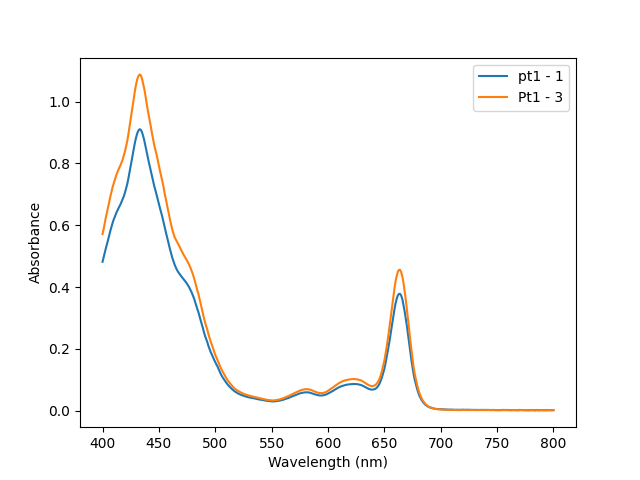

In [72]:
fig, ax = plt.subplots()

for sample in samples[1:]:
    ax.plot(clean_data[sample]["wavelength"], clean_data[sample]["absorbance"], label=sample)

ax.legend()
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Absorbance")

fig.savefig(fig_folder + "absorbance.png")


In [73]:
def get_concentrations_phaeo(df):
    
    E_664 = df["absorbance"][tools.closest_index(664, df["wavelength"])]
    E_630 = df["absorbance"][tools.closest_index(630, df["wavelength"])]
    
    Chl_a = 11.47 * E_664 - 0.4 * E_630
    Chl_c = 24.36 * E_630 - 3.73 * E_664
    
    return Chl_a, Chl_c
    
    

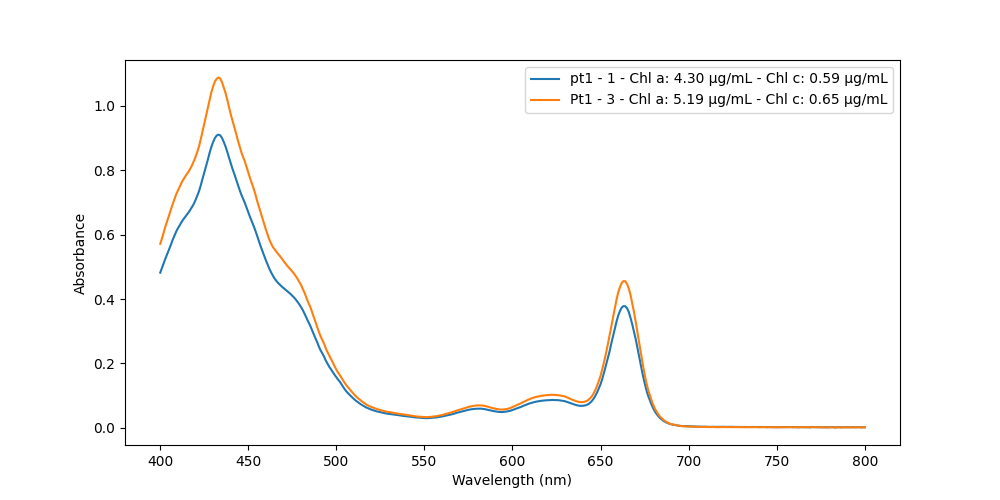

In [77]:
fig, ax = plt.subplots(figsize=(10, 5))

results = []

for sample in samples[1:]:
    Chl_a, Chl_c = get_concentrations_phaeo(clean_data[sample])    
    ax.plot(clean_data[sample]["wavelength"], clean_data[sample]["absorbance"], label= f"{sample} - Chl a: {Chl_a:.2f} µg/mL - Chl c: {Chl_c:.2f} µg/mL")
    results.append([Chl_a, Chl_c])

ax.legend()
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Absorbance")

fig.savefig(fig_folder + "absorbance_conc.png")

In [86]:
samples
sample_volume = np.array([5, 5])
sample_count = np.array([1.57e6, 1.88e6])

results = np.array(results)

culture_concentration = results/sample_volume
per_cell = culture_concentration/sample_count

table = {
    "Chl a in extract (µg/mL)": results[:,0],
    "Chl c in extract (µg/mL)": results[:,1],
    "Chl a in culture (µg/mL)": culture_concentration[:,0],
    "Chl c in culture (µg/mL)": culture_concentration[:,1],
    "Chl a per 1e6 cells (µg/cell)": per_cell[:,0]*1e6,
    "Chl c per 1e6 cells (µg/cell)": per_cell[:,1]*1e6,
    
    
}

table = pd.DataFrame(table, index=samples[1:])
table

,Chl a in extract (µg/mL),Chl c in extract (µg/mL),Chl a in culture (µg/mL),Chl c in culture (µg/mL),Chl a per 1e6 cells (µg/cell),Chl c per 1e6 cells (µg/cell)
pt1 - 1,4.298902,0.587134,0.859780,0.117427,0.547631,0.062461
Pt1 - 3,5.185873,0.650636,1.037175,0.130127,0.660621,0.069217
